# Installed Capacity Data Preparation

In [1]:
rm(list=ls())

In [2]:
library(fs)
library(forecast)
library(zoo)

Warning message:
"package 'forecast' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [3]:
folder <- getwd()
capacity <- read.csv(file.path(folder, "data/installed_capacity/raw/Installed Capacity per Production Type_201501010000-202401010000.csv"))
capacity <- as.data.frame(t(capacity))
colnames(capacity) <- as.character(capacity[1, ])
capacity <- capacity[-1, ]
capacity$year <- c(2015:2023)
colnames(capacity) <- c("wind_offshore", "wind_onshore", "grand_total", "year")
capacity$total_capacity <- as.numeric(capacity$wind_offshore) + as.numeric(capacity$wind_onshore)	
rownames(capacity) <- NULL
capacity$wind_offshore <- NULL
capacity$wind_onshore <- NULL
capacity$grand_total <- NULL

In [4]:
exp_capacity<-c(rep(capacity$total_capacity[1], 365),
             rep(capacity$total_capacity[2], 366),
             rep(capacity$total_capacity[3], 365),
             rep(capacity$total_capacity[4], 365),
             rep(capacity$total_capacity[5], 365),
             rep(capacity$total_capacity[6], 366),
             rep(capacity$total_capacity[7], 365),
             rep(capacity$total_capacity[8], 365),
             rep(capacity$total_capacity[9], 245))   

# Add Date
start_date <- as.Date("2015-01-01")  
end_date <- start_date + length(exp_capacity) - 1  
date_seq <- seq(start_date, end_date, by = "day")
exp_capacity <- data.frame(date = date_seq, total_capacity = exp_capacity)

# Smooth the installed capacity
smoothed_capacity<-rollmean(exp_capacity$total_capacity, k=365, fill=NA)
smoothed_capacity[1:182]<-exp_capacity$total_capacity[1:182]
smoothed_capacity[2986:3167]<-exp_capacity$total_capacity[2986:3167]
exp_capacity$smoothed_capacity <- smoothed_capacity
exp_capacity$total_capacity <- NULL

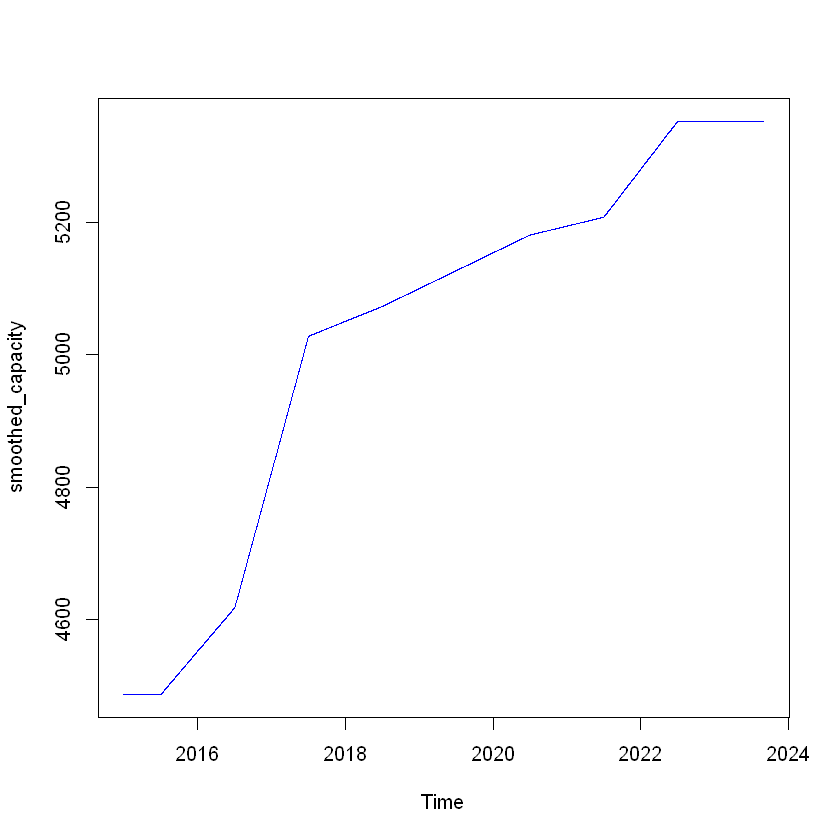

In [5]:
smoothed_capacity<-ts(exp_capacity$smoothed_capacity, frequency = 365.25, start=c(2015, 01, 01))
ts.plot(smoothed_capacity, col=c("blue"))

In [7]:
write.csv(exp_capacity, file=file.path(folder, "data/installed_capacity/final/intalled_capacity.csv"), row.names = FALSE)